In [1]:
import pandas as pd
import numpy as np
#!conda install -c conda-forge folium=0.5.0 --yes
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge scikit-learn --yes

from geopy.geocoders import Nominatim
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize 


In [2]:
##obtaining ips

address = 'San Isidro, PE'

geolocator = Nominatim(user_agent="pe_explorer")
location = geolocator.geocode(address)
latitudeSI = location.latitude
longitudeSI = location.longitude

address = 'Miraflores, PE'
location = geolocator.geocode(address)
latitudeMI = location.latitude
longitudeMI = location.longitude


address = 'Barranco, PE'
location = geolocator.geocode(address)
latitudeBA = location.latitude
longitudeBA = location.longitude

In [3]:
# @hidden_cell
#foursquare api
CLIENT_ID = 'FIECQYONEVP4KPHBVPPNAQBEGQNMI5OXCQXRLBZULHIQXGRN' # your Foursquare ID
CLIENT_SECRET = 'ZNHYYGDWWKADFEFQMXQBOTFR44I0FV12NKULW2CKD1Z5LLG0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: FIECQYONEVP4KPHBVPPNAQBEGQNMI5OXCQXRLBZULHIQXGRN
CLIENT_SECRET:ZNHYYGDWWKADFEFQMXQBOTFR44I0FV12NKULW2CKD1Z5LLG0


In [4]:
#venues Barranco

radius=1000
LIMIT=500
lat=latitudeBA
lng=longitudeBA
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesBA = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesBA.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesBA.head()

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito
0,5571fa2e498eb08a12a1c4a6,Pizerrìa La Linterna,-12.144713,-77.021933,Pizza Place,Barranco
1,4c002ea292a6c9287bcb43e2,Amoramar,-12.144075,-77.018201,Seafood Restaurant,Barranco
2,4bd644187b1876b0845e8c86,Sandwiches Monstruos,-12.141153,-77.021764,Sandwich Place,Barranco
3,53530299498eae3b9ab4a2a8,Belgicius,-12.141295,-77.021437,Belgian Restaurant,Lima
4,55f1cca8498e7a4cc0e1e86f,Canta Ranita,-12.146824,-77.021059,Seafood Restaurant,None


In [9]:
venuedetails=[]
#venues details Barranco
for id in nearby_venuesBA["id"]:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id,CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()["response"]
    price=-1
    rating=-1
    if "price" in results["venue"]:
        price=results["venue"]["price"]["tier"]
    if "rating" in results["venue"]:
        rating=results["venue"]["rating"]
   
    venuedetails.append([
            id,
            price, 
            rating, 
            results["venue"]["likes"]["count"]])
detailsBA=pd.DataFrame(venuedetails)
detailsBA.columns=["id","pricetier","rating","likes"]
detailsBA.to_csv("detallesBA.csv")

In [12]:

from project_lib import Project
sc=""
project = Project(sc,"72772986-6e8d-4264-b2dd-b1bddb0f54a7","p-6ff084c337a47b71c84e3394452ec28fed26fa41")
project.save_data(file_name = "detallesBA.csv",data = detailsBA.to_csv(index=False))


{'file_name': 'detallesBA.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': 'c5a02086-8105-4eb1-9bc5-836da1f6961f'}

In [5]:
detailsBA=pd.read_csv("detallesBA.csv")
detailsBA

,id,pricetier,rating,likes
0,5571fa2e498eb08a12a1c4a6,1,8.9,47
1,4c002ea292a6c9287bcb43e2,3,8.6,409
2,4bd644187b1876b0845e8c86,1,9.1,216
3,53530299498eae3b9ab4a2a8,-1,8.7,75
4,55f1cca8498e7a4cc0e1e86f,3,8.7,52
...,...,...,...,...
95,4dd040f4e4cd130e16941e5f,1,5.6,14
96,4e58031e18a82d0a334e4866,1,-1.0,0
97,5377ca72498e2210c5d491d9,1,-1.0,0
98,4e7fc57ff5b9a5dd443eb6af,1,5.6,5


In [6]:
#venues Miraflores
lat=latitudeMI
lng=longitudeMI
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesMI = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesMI.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesMI.head()

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito
0,58e6b88c3ef0f614cebfe3df,Barra Maretazo,-12.122958,-77.027749,Seafood Restaurant,Lima
1,59015616e1f0aa5911fd731d,PAN Atelier,-12.121402,-77.028104,Bakery,Lima
2,4c08856bd4149c742a3661d5,Las Tejas,-12.122348,-77.027360,South American Restaurant,Miraflores
3,4d7af74c4755f04ddb21f424,Saqra,-12.123993,-77.027041,Peruvian Restaurant,Miraflores
4,5ba90ba5f870fd002ce5c265,Milenaria Café,-12.121453,-77.027694,Café,Lima


In [14]:
venuedetails=[]
#venues details Miraflores
for id in nearby_venuesMI["id"]:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id,CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()["response"]
    price=-1
    rating=-1
    likes=-1
    if "price" in results["venue"]:
        price=results["venue"]["price"]["tier"]
    if "rating" in results["venue"]:
        rating=results["venue"]["rating"]
    if "likes" in results["venue"]:
        likes=results["venue"]["likes"]["count"]
   
    venuedetails.append([
            id,
            price, 
            rating, 
            likes])
detailsMI=pd.DataFrame(venuedetails)
detailsMI.columns=["id","pricetier","rating","likes"]
project = Project(sc,"72772986-6e8d-4264-b2dd-b1bddb0f54a7","p-6ff084c337a47b71c84e3394452ec28fed26fa41")
project.save_data(file_name = "detallesMI.csv",data = detailsMI.to_csv(index=False))

{'file_name': 'detallesMI.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': '39a13ff0-6a98-48e5-bff2-0cd6703b37ec'}

In [7]:
detailsMI=pd.read_csv("detallesMI.csv")
detailsMI.head()

,id,pricetier,rating,likes
0,58e6b88c3ef0f614cebfe3df,3,9.4,38
1,59015616e1f0aa5911fd731d,1,8.6,44
2,4c08856bd4149c742a3661d5,2,8.3,23
3,4d7af74c4755f04ddb21f424,2,8.4,199
4,5ba90ba5f870fd002ce5c265,1,8.0,4


In [8]:
#venues San Isidro

lat=latitudeSI
lng=longitudeSI
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06374d81259'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list=[]
venues_list.append([(
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue'].get("location").get("city")) for v in results])
nearby_venuesSI = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venuesSI.columns = ['id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Distrito']
nearby_venuesSI.head()

,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito
0,4cc2f8474fcfbfb763bbbd24,Lima 27,-12.096252,-77.035084,Peruvian Restaurant,San Isidro
1,56d88b07498effe63b0b746e,Primos Chicken Lovers Bar,-12.098140,-77.036146,Restaurant,San Isidro
2,52fbaf6b498eb8a688516643,Astrid y Gastón,-12.096591,-77.034695,Peruvian Restaurant,San Isidro
3,4f15ff95e5e8f419abbd0465,Le Café,-12.097256,-77.037704,Peruvian Restaurant,Lima
4,4bd78d2a88559521c7e387a7,Tanta,-12.096798,-77.035334,Peruvian Restaurant,San Isidro


In [51]:
venuedetails=[]
#venues details San Isidro
for id in nearby_venuesSI["id"]:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id,CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()["response"]
    price=-1
    rating=-1
    likes=-1
    if "price" in results["venue"]:
        price=results["venue"]["price"]["tier"]
    if "rating" in results["venue"]:
        rating=results["venue"]["rating"]
    if "likes" in results["venue"]:
        likes=results["venue"]["likes"]["count"]
   
    venuedetails.append([
            id,
            price, 
            rating, 
            likes])
detailsSI=pd.DataFrame(venuedetails)
detailsSI.columns=["id","pricetier","rating","likes"]
project.save_data(file_name = "detallesSI.csv",data = detailsSI.to_csv(index=False),overwrite=True)

{'file_name': 'detallesSI.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': '8ef921ba-c741-488d-be05-e98e38fa61ab'}

In [34]:
project.save_data(file_name = "detallesSI.csv",data = detailsSI.to_csv(index=False),overwrite=True)

{'file_name': 'detallesSI.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-cdbniqnpmorunq',
 'asset_id': '8ef921ba-c741-488d-be05-e98e38fa61ab'}

In [9]:
detailsSI=pd.read_csv("detallesSI.csv")
detailsSI.head()

,id,pricetier,rating,likes
0,4cc2f8474fcfbfb763bbbd24,2,8.7,359
1,56d88b07498effe63b0b746e,2,8.6,140
2,52fbaf6b498eb8a688516643,3,8.6,526
3,4f15ff95e5e8f419abbd0465,2,9.0,14
4,4bd78d2a88559521c7e387a7,2,8.4,422


In [10]:
#merging and cleaning

venuesSI=nearby_venuesSI.merge(detailsSI)
venuesMI=nearby_venuesMI.merge(detailsMI)
venuesBA=nearby_venuesBA.merge(detailsBA)

In [11]:
venuesSI["Venue Category"]=venuesSI["Venue Category"].str.replace(" Restaurant","")
venuesMI["Venue Category"]=venuesMI["Venue Category"].str.replace(" Restaurant","")
venuesBA["Venue Category"]=venuesBA["Venue Category"].str.replace(" Restaurant","")

In [12]:
venuesSI.loc[venuesSI["pricetier"]==-1,"pricetier"]=round(venuesSI["pricetier"].mean())
venuesMI.loc[venuesMI["pricetier"]==-1,"pricetier"]=round(venuesMI["pricetier"].mean())
venuesBA.loc[venuesBA["pricetier"]==-1,"pricetier"]=round(venuesBA["pricetier"].mean())

In [13]:
#describing final datasets
venuesSI[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,100.00000,100.00000,100.000000,100
unique,NaN,NaN,NaN,29
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,14
mean,1.88000,7.73500,87.020000,NaN
std,0.80754,0.62286,117.004099,NaN
min,1.00000,6.50000,5.000000,NaN
25%,1.00000,7.20000,11.750000,NaN
50%,2.00000,7.70000,40.500000,NaN
75%,2.00000,8.20000,99.000000,NaN


In [14]:
venuesMI[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,36
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,13
mean,1.780000,8.067000,133.740000,NaN
std,0.690191,0.503333,203.997208,NaN
min,1.000000,6.900000,4.000000,NaN
25%,1.000000,7.700000,23.000000,NaN
50%,2.000000,8.000000,53.500000,NaN
75%,2.000000,8.400000,149.750000,NaN


In [15]:
venuesBA[["pricetier","rating","likes","Venue Category"]].describe(include="all")

,pricetier,rating,likes,Venue Category
count,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,33
top,NaN,NaN,NaN,Peruvian
freq,NaN,NaN,NaN,12
mean,1.717172,7.354545,85.383838,NaN
std,0.756474,1.457442,147.167661,NaN
min,1.000000,-1.000000,0.000000,NaN
25%,1.000000,6.950000,9.500000,NaN
50%,2.000000,7.500000,27.000000,NaN
75%,2.000000,8.150000,106.000000,NaN


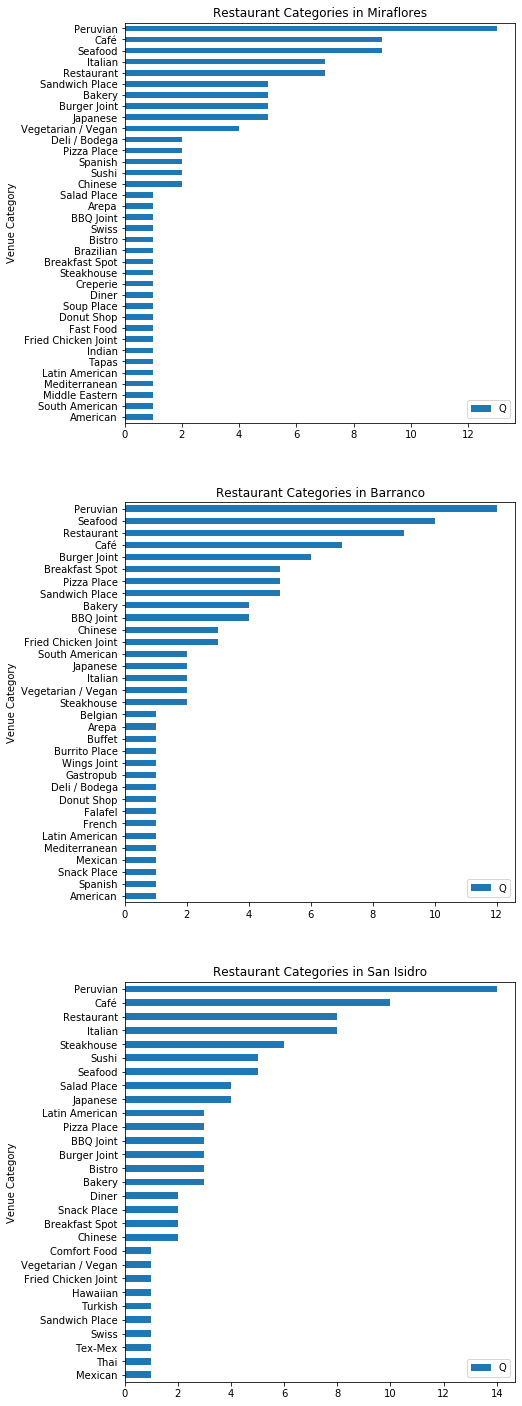

In [16]:
#graphs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,25)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(3, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(3, 1, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(3, 1, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


pd.DataFrame(venuesBA.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax1)
ax1.set_title("Restaurant Categories in Barranco")
ax1.legend(['Q'])

pd.DataFrame(venuesMI.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax0)
ax0.set_title("Restaurant Categories in Miraflores")
ax0.legend(['Q'])

pd.DataFrame(venuesSI.groupby("Venue Category")["id"].count()).sort_values("id",ascending=True).plot(kind="barh",ax=ax2)
ax2.set_title("Restaurant Categories in San Isidro")
ax2.legend(['Q'])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()


Text(0.5, 1.0, 'San Isidro price tier')

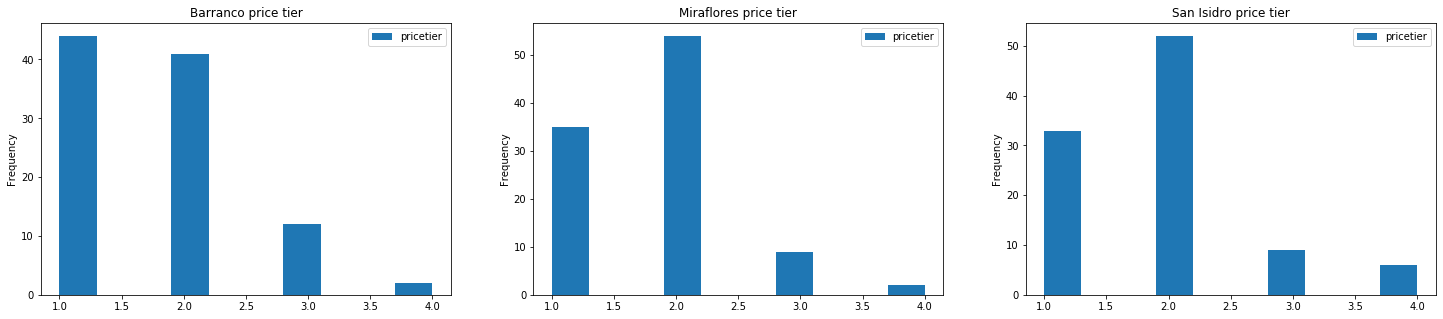

In [17]:
fig = plt.figure(figsize=(25,5)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

venuesBA[["pricetier"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco price tier")
venuesMI[["pricetier"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores price tier")
venuesSI[["pricetier"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro price tier")


Text(0.5, 1.0, 'San Isidro Ratings')

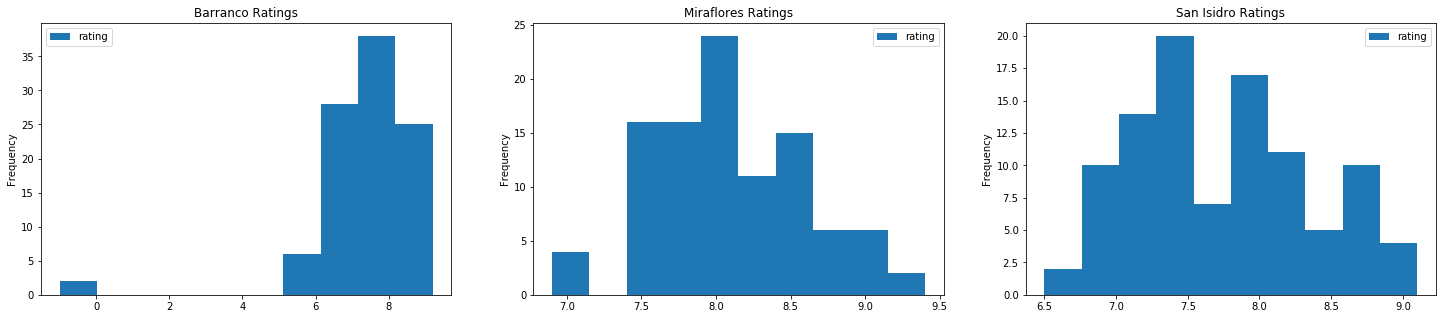

In [18]:
fig = plt.figure(figsize=(25,5)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
venuesBA[["rating"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco Ratings")
venuesMI[["rating"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores Ratings")
venuesSI[["rating"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro Ratings")


Text(0.5, 1.0, 'San Isidro Likes')

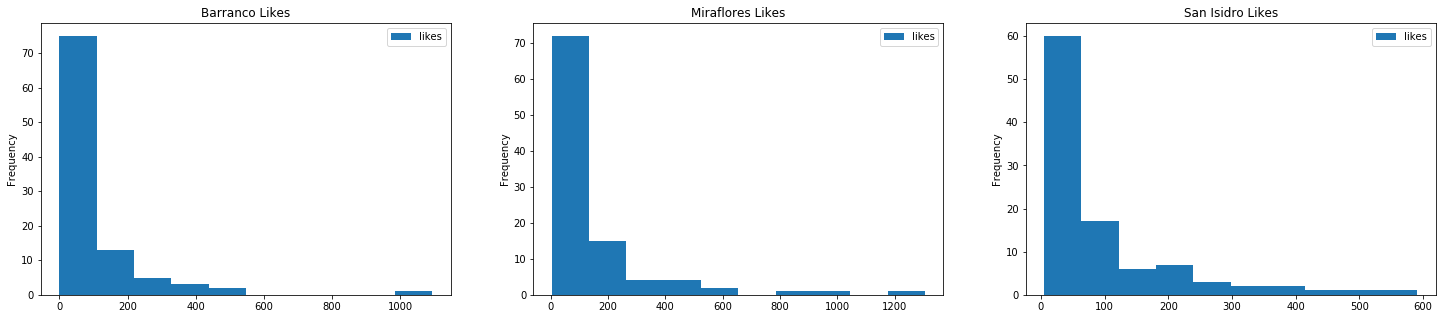

In [19]:
fig = plt.figure(figsize=(25,5)) # create figure

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
venuesBA[["likes"]].plot(kind="hist",ax=ax0)
ax0.set_title("Barranco Likes")
venuesMI[["likes"]].plot(kind="hist",ax=ax1)
ax1.set_title("Miraflores Likes")
venuesSI[["likes"]].plot(kind="hist",ax=ax2)
ax2.set_title("San Isidro Likes")


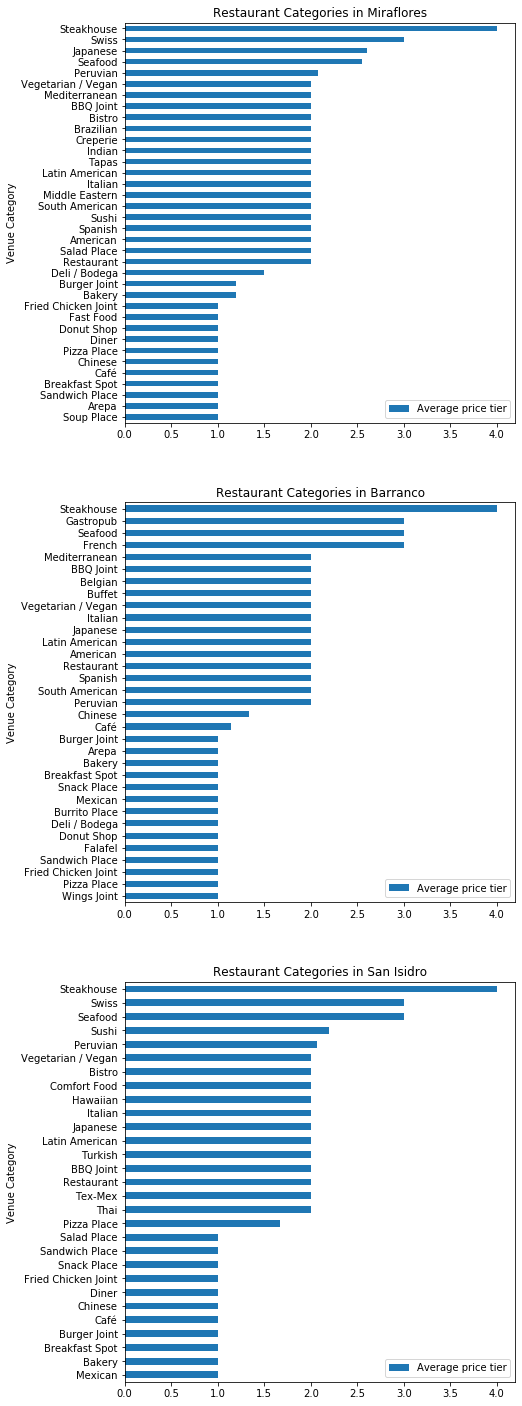

In [41]:
fig = plt.figure(figsize=(7,25)) # create figure
fig.tight_layout()
ax0 = fig.add_subplot(3, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(3, 1, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(3, 1, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


pd.DataFrame(venuesBA.groupby("Venue Category")["pricetier"].mean()).sort_values("pricetier",ascending=True).plot(kind="barh",ax=ax1)
ax1.set_title("Restaurant Categories in Barranco")
ax1.legend(['Average price tier'])

pd.DataFrame(venuesMI.groupby("Venue Category")["pricetier"].mean()).sort_values("pricetier",ascending=True).plot(kind="barh",ax=ax0)
ax0.set_title("Restaurant Categories in Miraflores")
ax0.legend(['Average price tier'])

pd.DataFrame(venuesSI.groupby("Venue Category")["pricetier"].mean()).sort_values("pricetier",ascending=True).plot(kind="barh",ax=ax2)
ax2.set_title("Restaurant Categories in San Isidro")
ax2.legend(['Average price tier'])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

In [37]:
# calculating clusters using DBSCAN

import sklearn
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
MI_onehot = pd.get_dummies(venuesMI[['Venue Category']], prefix="", prefix_sep="")
MI_onehot['rating']=venuesMI['rating']
MI_onehot['likes']=venuesMI['likes']
MI_onehot['pricetier']=venuesMI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = MI_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet_MI=Clus_dataSet
# Compute DBSCAN
db = DBSCAN(eps=2, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesMI["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [27]:
print(clusterNum)
print(venuesMI[venuesMI["Clus_Db"]==-1].shape)

7
(52, 10)


In [38]:
BA_onehot = pd.get_dummies(venuesBA[['Venue Category']], prefix="", prefix_sep="")
BA_onehot['rating']=venuesBA['rating']
BA_onehot['likes']=venuesBA['likes']
BA_onehot['pricetier']=venuesBA['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = BA_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet_BA=Clus_dataSet
# Compute DBSCAN
db = DBSCAN(eps=1.8, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesBA["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [24]:
print(clusterNum)
print(venuesBA[venuesBA["Clus_Db"]==-1].shape)
venuesBA[venuesBA["Clus_Db"]==-1].head()

9
(41, 10)


,id,Venue,Venue Latitude,Venue Longitude,Venue Category,Distrito,pricetier,rating,likes,Clus_Db
3,53530299498eae3b9ab4a2a8,Belgicius,-12.141295,-77.021437,Belgian,Lima,2,8.7,75,-1
5,4beedd42e8c3c928fb449992,Chifa Chung Yion,-12.147327,-77.020927,Chinese,Barranco,2,8.7,439,-1
6,525c371c498ea05651a42be7,La Cuadra De Salvador,-12.141289,-77.022421,Steakhouse,Barranco,4,8.6,159,-1
10,4b965f38f964a5209fc834e3,La Espiga de Oro,-12.142968,-77.022081,Bakery,Lima,1,7.9,35,-1
13,566c522b498ec5ed8d9bc862,La Panetteria,-12.148122,-77.021327,Bakery,Barranco,1,8.5,66,-1


In [39]:
import sklearn
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
SI_onehot = pd.get_dummies(venuesSI[['Venue Category']], prefix="", prefix_sep="")
SI_onehot['rating']=venuesSI['rating']
#SI_onehot['likes']=venuesSI['likes']
SI_onehot['pricetier']=venuesSI['pricetier']
sklearn.utils.check_random_state(1000)
Clus_dataSet = SI_onehot
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet_SI=Clus_dataSet
# Compute DBSCAN
db = DBSCAN(eps=2.5, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
venuesSI["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [29]:
print(clusterNum)
print(venuesSI[venuesSI["Clus_Db"]==-1].shape)



8
(44, 10)


Text(0.5, 1.0, 'Barranco')

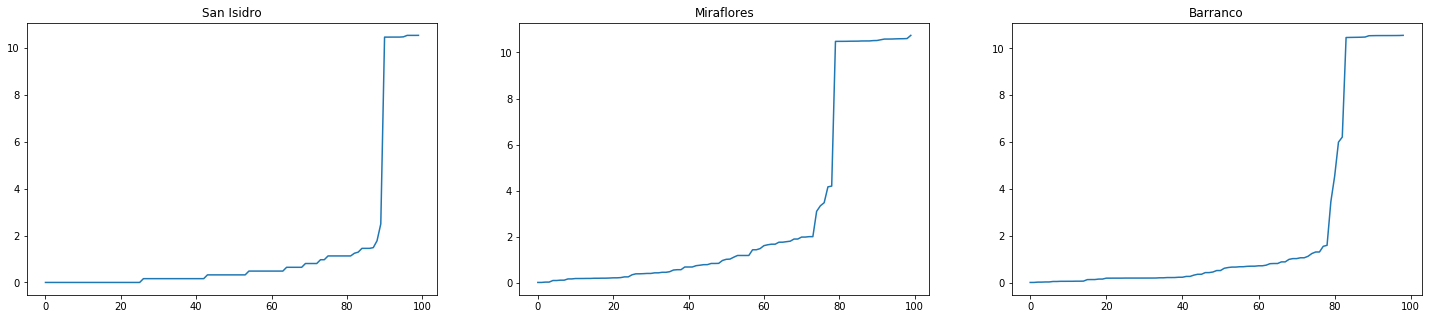

In [40]:
#Calculating optimal epsilons

from sklearn.neighbors import NearestNeighbors
fig = plt.figure(figsize=(25,5)) # create figure

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)


neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Clus_dataSet_SI)
distances, indices = nbrs.kneighbors(Clus_dataSet_SI)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax0.plot(distances)
ax0.set_title("San Isidro")
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Clus_dataSet_MI)
distances, indices = nbrs.kneighbors(Clus_dataSet_MI)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax1.plot(distances)
ax1.set_title("Miraflores")

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Clus_dataSet_BA)
distances, indices = nbrs.kneighbors(Clus_dataSet_BA)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax2.plot(distances)
ax2.set_title("Barranco")


In [42]:
#drawing clusters Barranco

import matplotlib.cm as cm
import matplotlib.colors as colors
# create map

map_clusters = folium.Map(location=[latitudeBA, longitudeBA], zoom_start=15)

# set color scheme for the clusters
x = np.arange(len(set(venuesBA["Clus_Db"])))
ys = [i + x + (i*x)**2 for i in range(len(set(venuesBA["Clus_Db"])))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(venuesBA['Venue Latitude'], venuesBA['Venue Longitude'], venuesBA['Clus_Db']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    c=(("#C8C8C8") if cluster == -1 else rainbow[cluster-1])
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
#drawing clusters San Isidro
map_clusters = folium.Map(location=[latitudeSI, longitudeSI], zoom_start=15)

# set color scheme for the clusters
x = np.arange(len(set(venuesSI["Clus_Db"])))
ys = [i + x + (i*x)**2 for i in range(len(set(venuesSI["Clus_Db"])))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(venuesSI['Venue Latitude'], venuesSI['Venue Longitude'], venuesSI['Clus_Db']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    c=(("#C8C8C8") if cluster == -1 else rainbow[cluster-1])
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
#drawing clusters Miraflores

map_clusters = folium.Map(location=[latitudeMI, longitudeMI], zoom_start=15)

# set color scheme for the clusters
x = np.arange(len(set(venuesMI["Clus_Db"])))
ys = [i + x + (i*x)**2 for i in range(len(set(venuesMI["Clus_Db"])))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(venuesMI['Venue Latitude'], venuesMI['Venue Longitude'], venuesMI['Clus_Db']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    c=(("#C8C8C8") if cluster == -1 else rainbow[cluster-1])
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color=c,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:
#cluster summary Miraflores
summaryClustersMI=[]
for clus in set(venuesMI.Clus_Db):
    if clus!=-1:
        x=venuesMI[venuesMI.Clus_Db==clus][["pricetier","Venue Category","rating","likes"]].describe(include="all")
        
        
        topCategory=x.loc["top"]["Venue Category"]
        means=x.loc["mean",["pricetier","rating","likes"]]
        q=x.loc["count"][0]
        pricetier=means[0]
        rating=means[1]
        likes=means[2]
        summaryClustersMI.append([topCategory,pricetier,rating,likes,clus,q])

summaryClustersMIdf=pd.DataFrame(summaryClustersMI)
summaryClustersMIdf.columns=["Top Category","Avg Price Tier","Avg Rating","Avg Likes","Cluster","Quantity"]
summaryClustersMIdf

,Top Category,Avg Price Tier,Avg Rating,Avg Likes,Cluster,Quantity
0,Peruvian,2.083333,8.091667,186.583333,0,12.0
1,Café,1.000000,7.888889,82.000000,1,9.0
2,Seafood,2.625000,8.150000,49.750000,2,8.0
3,Restaurant,2.000000,7.971429,12.571429,3,7.0
4,Italian,2.000000,8.114286,102.714286,4,7.0
5,Sandwich Place,1.000000,8.120000,58.200000,5,5.0


In [45]:
#cluster summary Barranco
summaryClustersBA=[]
for clus in set(venuesBA.Clus_Db):
    if clus!=-1:
        x=venuesBA[venuesBA.Clus_Db==clus][["pricetier","Venue Category","rating","likes"]].describe(include="all")
        
        
        topCategory=x.loc["top"]["Venue Category"]
        means=x.loc["mean",["pricetier","rating","likes"]]
        q=x.loc["count"][0]
        pricetier=means[0]
        rating=means[1]
        likes=means[2]
        summaryClustersBA.append([topCategory,pricetier,rating,likes,clus,q])

summaryClustersBAdf=pd.DataFrame(summaryClustersBA)
summaryClustersBAdf.columns=["Top Category","Avg Price Tier","Avg Rating","Avg Likes","Cluster","Quantity"]
summaryClustersBAdf

,Top Category,Avg Price Tier,Avg Rating,Avg Likes,Cluster,Quantity
0,Seafood,3.000000,7.740000,97.300000,0,10.0
1,Sandwich Place,1.000000,7.480000,57.000000,1,5.0
2,Restaurant,2.000000,7.862500,38.750000,2,8.0
3,Burger Joint,1.000000,7.500000,18.666667,3,6.0
4,Peruvian,2.000000,7.600000,160.500000,4,12.0
5,Café,1.166667,7.366667,91.666667,5,6.0
6,Breakfast Spot,1.000000,7.120000,6.800000,6,5.0
7,Pizza Place,1.000000,6.960000,17.200000,7,5.0


In [35]:
#cluster summary San Isidro
summaryClustersSI=[]
for clus in set(venuesSI.Clus_Db):
    if clus!=-1:
        x=venuesSI[venuesSI.Clus_Db==clus][["pricetier","Venue Category","rating","likes"]].describe(include="all")
        
        
        topCategory=x.loc["top"]["Venue Category"]
        means=x.loc["mean",["pricetier","rating","likes"]]
        q=x.loc["count"][0]
        pricetier=means[0]
        rating=means[1]
        likes=means[2]
        summaryClustersSI.append([topCategory,pricetier,rating,likes,clus,q])

summaryClustersSIdf=pd.DataFrame(summaryClustersSI)
summaryClustersSIdf.columns=["Top Category","Avg Price Tier","Avg Rating","Avg Likes","Cluster","Quantity"]
summaryClustersSIdf

,Top Category,Avg Price Tier,Avg Rating,Avg Likes,Cluster,Quantity
0,Peruvian,2.071429,8.028571,117.857143,0,14.0
1,Restaurant,2.000000,7.587500,46.875000,1,8.0
2,Steakhouse,4.000000,8.100000,130.166667,2,6.0
3,Sushi,2.200000,8.200000,110.200000,3,5.0
4,Café,1.000000,7.750000,52.400000,4,10.0
5,Italian,2.000000,7.912500,101.625000,5,8.0
6,Seafood,3.000000,7.520000,81.600000,6,5.0
